In [50]:
# data operations
import numpy as np
import pandas as pd

import os

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import axes3d

# For regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale
#import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf  #Provides a formula-based interface

%matplotlib inline
#plt.style.use('seaborn-white')

homedir=os.environ['HOME'] + '/'
datapath=homedir+ "datasets/"
advtdatafile=datapath + "Advertising.csv"

### Create pandas DataFrame

In [74]:
dataset = pd.read_csv(advtdatafile)
dataset_org = dataset

In [52]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [53]:
dataset.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [54]:
dataset.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [55]:
## Check whether any column has null entries
dataset.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

### Column selection
* Select all rows
* Select relevant columns - TV, Radio, Newspaper, Sales

In [56]:
tmpds = dataset
dataset = tmpds.iloc[:,1:5]
dataset

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


### Quick check basics - random data generation

* Random normal distribution (1000 floats)

In [57]:
rnd_normalf = np.random.randn(1000)
print(type(rnd_normalf))

<class 'numpy.ndarray'>


* Choice of 5 samples from previous random samples of 1000

In [58]:
replace_samples = 5
sample_data = np.random.choice(rnd_normalf, replace_samples, replace=True)
print(f"Sample data -> {sample_data}")

Sample data -> [-1.59785777 -0.88608702 -1.59785777  0.16589166 -0.69871837]


In [59]:
import random
num_smpls = 10
rnd_sample = random.sample(range(1, 1000), num_smpls)
print(type(rnd_sample))
#rnd_sample

<class 'list'>


#### Convert `python list` to `numpy ndarray`
* Python `List` to `numpy array` -> 1D array
* Add pad elements at the end of the array based on columns
* Reshape the array to suitable number of rows and columns
* There could be a better method - but this is one method


In [60]:
# list 
numlist = [ 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 10 ]
print(f"numlist -> {numlist}, size -> {len(numlist)}")
num_cols = 2
# calculate remainder
rem = len(numlist) % num_cols
# remaining cols for padding
pad = num_cols - rem
print(f"pad numbers -> {pad}")
# convert list to numpy array
numarr = np.array(numlist)
print(f"type numarr -> {type(numarr)}, shape -> {numarr.shape}")
print(f"numarr -> {numarr}")
numarr_pad = np.pad(numarr, pad_width=(0, rem), mode='constant', constant_values=0)
# reshape the numpy array
numrshp = numarr_pad.reshape(-1, 2)
print(f"type numrshp -> {type(numrshp)}, shape -> {numrshp.shape}")
# print(f"numrshp -> {numrshp}")

numlist -> [1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 10], size -> 11
pad numbers -> 1
type numarr -> <class 'numpy.ndarray'>, shape -> (11,)
numarr -> [ 1  2  3  4  5  6  7  8  9  0 10]
type numrshp -> <class 'numpy.ndarray'>, shape -> (6, 2)


### Create Pandas DataFrame
* Convert the random sample list to numpy array
* numpy array to Pandas DataFramer

In [61]:
rnd_df = pd.DataFrame(np.array(rnd_sample).reshape(-1, 2))
print(f"rnd_df -> {rnd_df}")

rnd_df ->      0    1
0  544  160
1   82  904
2  586  659
3  899  204
4  425  100


### seaborn pairplot()
* Visualizing pairwise relationships between multiple variables in a dataset. 
* Creates a grid of subplots where each numeric variable is shared across the x and y axes
* Allows quick exploratory data analysis 

#### KDE plot - `Kernel Density Estimate`

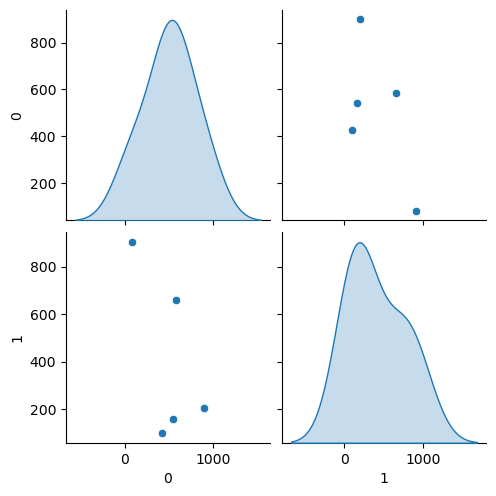

In [62]:
import seaborn as sns
cell_enabled = True
if cell_enabled:
    sns.pairplot(rnd_df, diag_kind='kde')

Hist Plot - `Histogram`

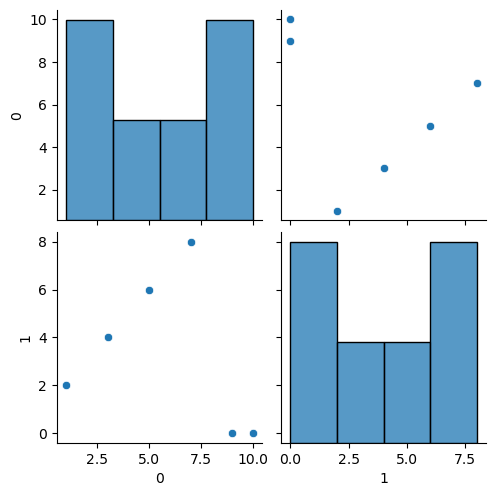

In [63]:
import seaborn as sns
cell_enabled = True
if cell_enabled:
    tmpdf = pd.DataFrame(numrshp)
    sns.pairplot(tmpdf, diag_kind='hist')

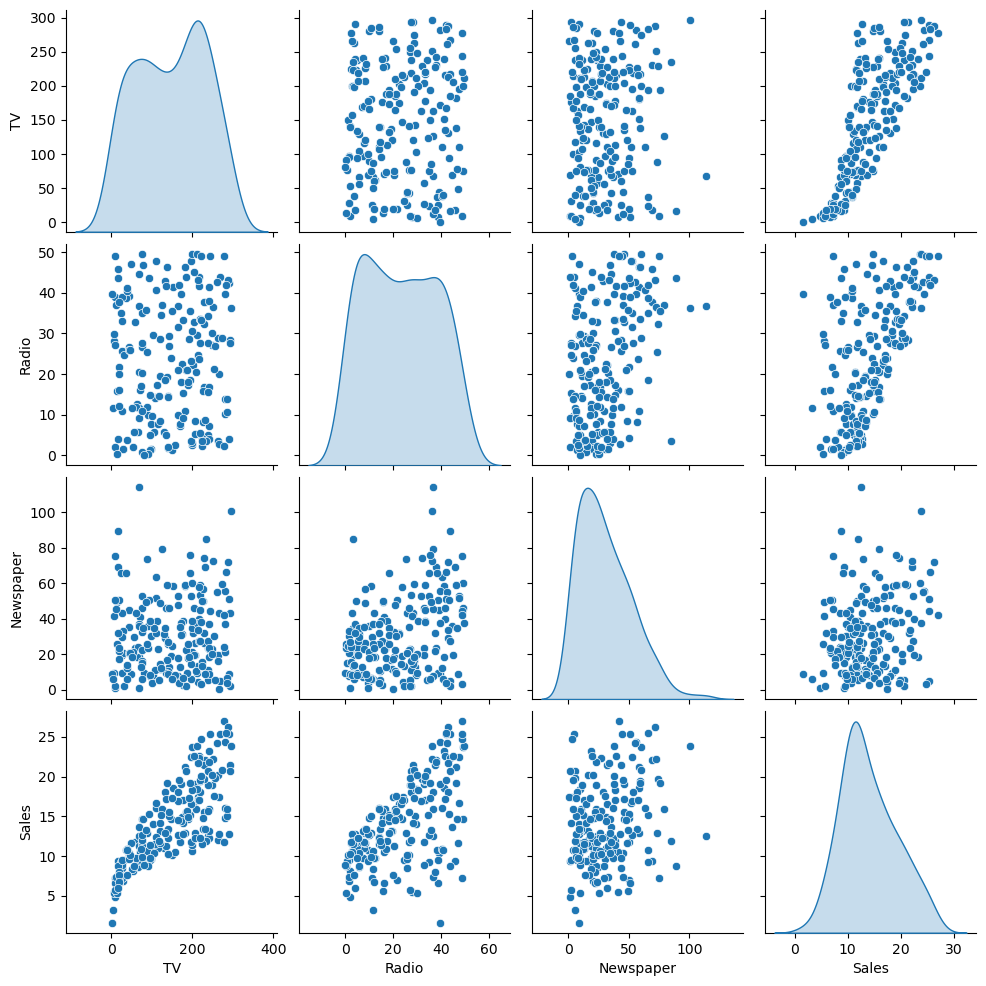

In [64]:
import seaborn as sns
# Check for linearity. We can also draw the pairplot for 
# checking the relationship
sns.pairplot(dataset, diag_kind='kde')

### Correlation Coefficients - `DataFrame.corr()`
* Computes the pairwise correlation coefficient between all numeric 
columns in a DataFrame,
* Returns DataFrame called as `Correlation Matrix`
* Quantifies the strength and direction of the linear relationship between variables. 
* A result ranges from -1 to 1:
  - `1`: Indicates perfect positive 
  - `-1`: Indicates perfect negative
  - `0`: No relationship


In [65]:
corr = dataset.corr()
#rint(f"correlation ->\n{corr}")
corr

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


### Correlation Coffecients `Heatmap`

<Axes: >

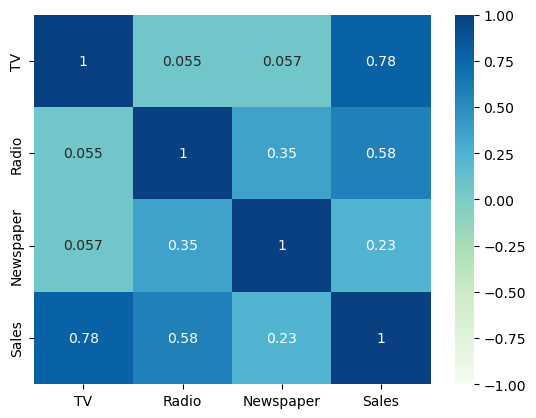

In [69]:
sns.heatmap(corr, vmax=1, vmin=-1, annot=True, cmap='GnBu')

## Using the STATS Models

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

### OLS - `Ordinary Least Squares`
* Core functionality is to estimate the parameters of a linear 
regression model by minimizing the sum of the squared differences 
(residuals) between the observed and predicted values.
* Returns detailed statistical output.

In [71]:
sales_on_tvradio = smf.ols('Sales ~ TV + Radio', dataset).fit()
sales_on_tvradio.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.9211,0.294,9.919,0.000,2.340,3.502
TV,0.0458,0.001,32.909,0.000,0.043,0.048
Radio,0.1880,0.008,23.382,0.000,0.172,0.204


### OLS return - Statistical Data
* Coefficient Estimation
* Statistical significance - `p-value, t-value`
* Model fit metrics - `R-squared`
* Other parameters

In [72]:
sales_on_tvradio.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Thu, 15 Jan 2026   Prob (F-statistic):           4.83e-98
Time:                        17:55:50   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Add Newspaper to the set of independent variables

In [ ]:
# Add Newspaper to the set of independent variables
sales_on_tvradio = smf.ols('Sales ~ TV + Radio + Newspaper', dataset).fit()
sales_on_tvradio.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.9389,0.312,9.422,0.000,2.324,3.554
TV,0.0458,0.001,32.809,0.000,0.043,0.049
Radio,0.1885,0.009,21.893,0.000,0.172,0.206
Newspaper,-0.0010,0.006,-0.177,0.860,-0.013,0.011


### `Model` Building with `{Training, Test}` Datasets

#### Column Split original data
* `Y`: dependent variable `{Sales}`
* `X`: independent variable `{TV, Radio, Newspaper}`

In [80]:
dataset_org
X = dataset_org.drop(['Unnamed: 0', 'Sales'], axis=1)
Y = dataset_org.Sales

#### Row Split original data {Training, Test}

In [82]:
Xtrn, Xtst, Ytrn, Ytst = train_test_split(X, Y, test_size=0.3, random_state = 1)

#### LinearRegression

In [83]:
reg_model = LinearRegression()
reg_model.fit(Xtrn, Ytrn)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


#### Result Interpretation

* Print the coeffcients

In [90]:
for idx, col_name in enumerate(Xtrn.columns):
    print(f"Coefficent of {col_name} = {reg_model.coef_[idx]}")

Coefficent of TV = 0.046952047768484634
Coefficent of Radio = 0.17658643526817377
Coefficent of Newspaper = 0.001851153318892268


* Create DataFrame and Print

In [101]:
print(f"{type(reg_model.coef_)}")
model_coeff_df = pd.DataFrame(reg_model.coef_)
# Co
model_coeff_df.index = [x[1] for x in enumerate(Xtrn.columns)]
print(f"\nCoefficients ->\n{model_coeff_df.to_string(header=False)}")
print(f"\nIntercept -> {reg_model.intercept_}")

<class 'numpy.ndarray'>

Coefficients ->
TV         0.046952
Radio      0.176586
Newspaper  0.001851

Intercept -> 2.937215734690607


### Prediction using Test Data
* Test data features {TV, Radio, Newspaper}
* Coefficients as calculated by the LR Model
* Sales = Intercept + (TV coef * TV) + (Radio coef * Radio) + (Newspaper coef * Newspaper)

In [ ]:
Ypred = reg_model.predict(Xtst)

array([21.66318307, 16.44137936,  7.69144625, 17.9163172 , 18.67047113,
       23.79199311, 16.2825425 , 13.44138683,  9.15294033, 17.32475313,
       14.43922876,  9.84019547, 17.26329945, 16.62853147, 15.09158705,
       15.50173894, 12.43404074, 17.32591521, 11.04327486, 18.05652777,
        9.35309526, 12.79465958,  8.73413846, 10.47225333, 11.38216042,
       15.02658554,  9.7406823 , 19.44676903, 18.19211174, 17.20178728,
       21.56359539, 14.70484262, 16.2635213 , 12.37098906, 19.97059316,
       15.36768988, 14.00399515, 10.0772945 , 20.91891557,  7.43833283,
        3.67031166,  7.27760354,  5.99523188, 18.41497546,  8.31868226,
       14.1090252 , 14.93697583, 20.35882814, 20.56271636, 19.55380813,
       24.10360923, 14.84985778,  6.71474914, 19.77761567, 18.93996367,
       12.5109195 , 14.20052652,  6.10844697, 15.3695344 ,  9.56769111])

#### R2 Score 
* Coefficient of Determination 
* Represents the proportion of variance (of y) that has been explained by the independent variables in the model

In [103]:
score = reg_model.score(Xtst, Ytst)
print(f"R2 score for the LR model -> {score}")

R2 score for the LR model -> 0.9224605706201435
